In [1]:
import numpy as np
import os
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D

In [2]:
files_train = 0
files_validation = 0
cwd = os.getcwd()
folder = 'train_data/train'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    files_train +=len(files)
    
folder = 'train_data/test'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    files_validation +=len(files)

print(files_train, files_validation)

432 164


In [5]:
img_width, img_height = 48,48
train_data_dir = 'train_data/train'
validation_data_dir = 'train_data/test'
nb_train_sample = files_train
nb_validation_sample = files_validation
batch_size = 32
epochs = 15
num_classes = 2

In [7]:
model = applications.VGG16(weights = 'imagenet', include_top = False, input_shape = (img_width, img_height, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [9]:
model.layers

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [11]:
for layer in model.layers[:10]:
    layer.traiable = False

In [15]:
x = model.output
x = Flatten()(x)

predictions = Dense(num_classes, activation = 'softmax')(x)
model_final = Model(inputs = model.input, outputs = predictions)

model_final.compile(loss = 'categorical_crossentropy', 
                    optimizer = optimizers.SGD(learning_rate = 0.0001, momentum=0.9), 
                    metrics=['accuracy'])

In [17]:
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, 
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1, 
                  height_shift_range=0.1, rotation_range=5)

test_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, 
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1, 
                  height_shift_range=0.1, rotation_range=5)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_height, img_width), 
                                 batch_size = batch_size, class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(img_height, img_width), 
                                 batch_size = batch_size, class_mode = 'categorical')

Found 432 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [21]:
history = model_final.fit(
train_generator, steps_per_epoch=nb_train_sample//batch_size, 
    validation_steps=nb_validation_sample//batch_size, 
epochs = epochs, validation_data=validation_generator)

C:\Users\domma\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 871ms/step - accuracy: 0.5513 - loss: 0.6562

C:\Users\domma\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.5601 - loss: 0.6486 - val_accuracy: 0.7688 - val_loss: 0.4446
Epoch 2/15
 1/13 ━━━━━━━━━━━━━━━━━━━━ 8s 738ms/step - accuracy: 0.8125 - loss: 0.3548

C:\Users\domma\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8125 - loss: 0.3548 - val_accuracy: 0.7500 - val_loss: 0.4537
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 811ms/step - accuracy: 0.7620 - loss: 0.4089 - val_accuracy: 0.8813 - val_loss: 0.3038
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.1779 - val_accuracy: 1.0000 - val_loss: 0.2235
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 825ms/step - accuracy: 0.9465 - loss: 0.2414 - val_accuracy: 0.8750 - val_loss: 0.2452
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9375 - loss: 0.2097 - val_accuracy: 1.0000 - val_loss: 0.0663
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 796ms/step - accuracy: 0.9692 - loss: 0.1333 - val_accuracy: 0.8875 - val_loss: 0.2162
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0571 - val_accuracy: 1.0000 - val_loss: 0.0341
Epoch 9/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 789ms/step - accuracy: 0.9848 - loss: 0.1118 - val_accuracy: 0.9125 - val_

In [22]:
history.history

{'accuracy': [0.675000011920929,
  0.8125,
  0.8052884340286255,
  1.0,
  0.9591346383094788,
  0.9375,
  0.9599999785423279,
  1.0,
  0.9775000214576721,
  0.90625,
  0.9800000190734863,
  0.96875,
  0.9700000286102295,
  0.96875,
  0.987500011920929],
 'loss': [0.549608588218689,
  0.354841411113739,
  0.3609096109867096,
  0.17790037393569946,
  0.21667234599590302,
  0.2097257822751999,
  0.15233135223388672,
  0.05713823065161705,
  0.11332876235246658,
  0.09295406937599182,
  0.07814469933509827,
  0.15051300823688507,
  0.07633371651172638,
  0.05836614966392517,
  0.06330389529466629],
 'val_accuracy': [0.768750011920929,
  0.75,
  0.8812500238418579,
  1.0,
  0.875,
  1.0,
  0.887499988079071,
  1.0,
  0.9125000238418579,
  1.0,
  0.9125000238418579,
  1.0,
  0.918749988079071,
  1.0,
  0.9375],
 'val_loss': [0.44458723068237305,
  0.4537183344364166,
  0.3037692904472351,
  0.22345861792564392,
  0.24519868195056915,
  0.06633089482784271,
  0.21623584628105164,
  0.03409153

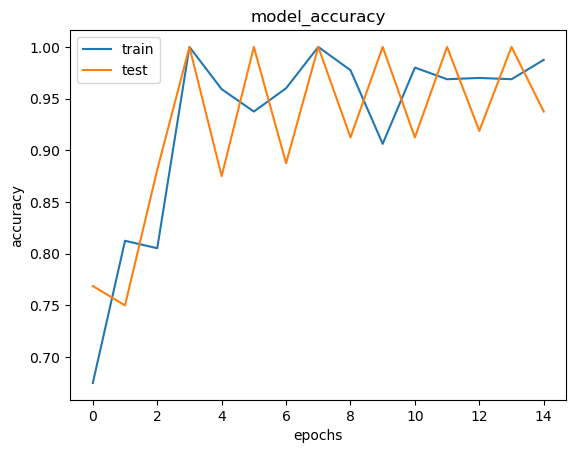

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

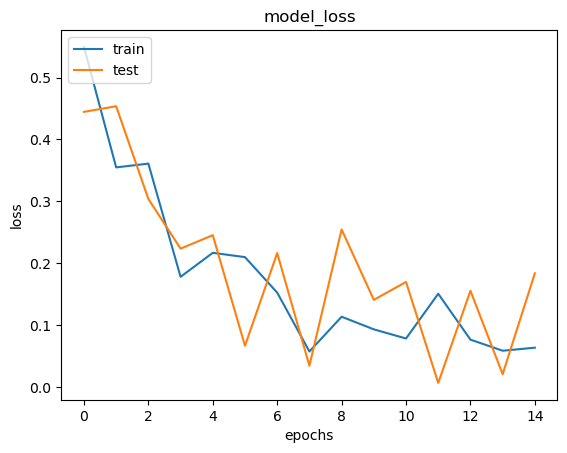

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [29]:
model_final.save('model_final.h5')

In [31]:
class_dictionary = {}
class_dictionary[0]  = 'no_car'
class_dictionary[1]  = 'car'

In [33]:
class_dictionary

{0: 'no_car', 1: 'car'}

In [35]:
import cv2
import numpy as np

def make_prediction(image):
    image = cv2.imread(image)
    image = cv2.resize(image, (48, 48))
    img = image/255
#     (1, 48, 48, 3) -> 4D Tensor
    img = np.expand_dims(img, axis = 0)
    
    class_predicted = model_final.predict(img)
    intId = np.argmax(class_predicted[0])
    label = class_dictionary[intId]
    return label

In [37]:
make_prediction("00000000_00000017.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


'car'

In [43]:
make_prediction("00000000_00000185.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


'no_car'